In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pathlib
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
import shutil
import os

In [2]:
pkmon = pd.read_csv("pokemon.csv")
pkmon = pkmon.set_index("Name")

In [11]:
pkmon.head()

,Type1,Type2
Name,,
bulbasaur,Grass,Poison
ivysaur,Grass,Poison
venusaur,Grass,Poison
charmander,Fire,NaN
charmeleon,Fire,NaN


In [4]:
pkmon

,Type1,Type2
Name,,
bulbasaur,Grass,Poison
ivysaur,Grass,Poison
venusaur,Grass,Poison
charmander,Fire,NaN
charmeleon,Fire,NaN
...,...,...
stakataka,Rock,Steel
blacephalon,Fire,Ghost
zeraora,Electric,NaN


In [12]:
pkmondir = pathlib.Path('C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\images')

In [13]:
image_count = len(list(pkmondir.glob('**/*.png')))
print(image_count)

0


In [7]:
#PIL.Image.open(str(list(pkmondir.glob('**/*.png'))[0]))

In [4]:
types = pkmon['Type1'].unique()
types

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [6]:
#Make folders for each type
# for tpe in types:
#     os.mkdir('C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\images_classified\\' + tpe)

In [ ]:
#type 2 code no worky
# for tpe in types:
#    for tpe2 in types:
#        if tpe != tpe2:
#           os.mkdir('C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\images_classified\\' + tpe + '_' + tpe2)


#Used to move images from images folder into sorted by type and type 2, had to use both with .png and .jpg no worky
# for file in pkmondir.glob('**/*.png'):
#    name = str(file)
#    name = name[name.index("images\\")+7:-4]
#    if (str(pkmon.loc[name]['Type2'])=="nan"):
#        shutil.move('C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\images\\' + name + ".png", 
#                   'C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\images_classified\\' + pkmon.loc[name]['Type1'] + '\\' + name + ".png")
#    else:
#        shutil.move('C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\images\\' + name + ".png", 
#                   'C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\images_classified\\' + pkmon.loc[name]['Type1'] + "_" + pkmon.loc[name]['Type2'] + '\\' + name + ".png")


In [12]:
# for file in pkmondir.glob('**/*.png'):
#    name = str(file)
#    name = name[name.index("images\\")+7:-4]
#    shutil.move('C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\images\\' + name + ".png", 
#                   'C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\images_classified\\' + pkmon.loc[name]['Type1'] + '\\' + name + ".png")

In [13]:
# for file in pkmondir.glob('**/*.jpg'):
#    name = str(file)
#    name = name[name.index("images\\")+7:-4]
#    shutil.move('C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\images\\' + name + ".jpg", 
#                   'C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\images_classified\\' + pkmon.loc[name]['Type1'] + '\\' + name + ".jpg")

In [8]:
pkmonpics2 = np.load('C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\poke_image_data.npy')

In [10]:
pkmon2 = pd.read_csv('names_and_strengths.csv')
pkmon2.head()

,name,strength
0,Abomasnow,494
1,Abomasnow,494
2,Abomasnow,494
3,Abomasnow,494
4,Abomasnow,494


In [11]:
#new images
# from PIL import Image
# for i in range(len(pkmonpics2)):
#    im = Image.fromarray(pkmonpics2[i])
#    im.save('C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\newimg\\' + pkmon2.iloc[i]['name'] + str(i) + ".png")

In [12]:
newpkmondir = pathlib.Path('C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\newimg')
pkmon_with_changes = pd.read_csv('pokemon_with_newimg_changes.csv')
pkmon_with_changes = pkmon_with_changes.set_index("Name")

In [15]:
#moves newimg into sorted folders
for file in newpkmondir.glob('**/*.png'):
    name = str(file).lower()
    name = name[name.index("newimg\\")+7:[x.isdigit() for x in name].index(True)]
    for file2 in newpkmondir.glob(name + "*"):
        name2 = str(file2)[str(file2).index("newimg\\")+7:-4]
        shutil.move(file2, 
                      'C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\images_classified\\' + pkmon_with_changes.loc[name]['Type1'] + '\\' + name2 + ".jpg")

In [56]:
#delete empty folders
# for file in pkmonclassifieddir.glob('**\\'):
#     if len(os.listdir(file)) == 0: # Check if the folder is empty
#         shutil.rmtree(file)

In [17]:
batch_size = 32
img_height = 100
img_width = 100

In [17]:
#new path for classified pokemon
pkmonclassifieddir = pathlib.Path('C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\images_classified')

In [19]:
import splitfolders
splitfolders.ratio(pkmonclassifieddir, output="C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\new_images_classified_only_100", seed=1337, ratio=(.8, 0.1,0.1)) 


Copying files: 0 files [00:00, ? files/s]
Copying files: 69 files [00:00, 683.30 files/s]
Copying files: 164 files [00:00, 818.49 files/s]
Copying files: 266 files [00:00, 882.63 files/s]
Copying files: 373 files [00:00, 914.91 files/s]
Copying files: 465 files [00:00, 878.38 files/s]
Copying files: 559 files [00:00, 896.02 files/s]
Copying files: 651 files [00:00, 887.15 files/s]
Copying files: 747 files [00:00, 898.92 files/s]
Copying files: 845 files [00:00, 910.92 files/s]
Copying files: 937 files [00:01, 864.91 files/s]
Copying files: 1039 files [00:01, 891.87 files/s]
Copying files: 1151 files [00:01, 918.30 files/s]
Copying files: 1257 files [00:01, 925.38 files/s]
Copying files: 1354 files [00:01, 937.36 files/s]
Copying files: 1448 files [00:01, 921.09 files/s]
Copying files: 1541 files [00:01, 918.68 files/s]
Copying files: 1633 files [00:01, 881.18 files/s]
Copying files: 1722 files [00:01, 880.35 files/s]
Copying files: 1811 files [00:02, 869.93 files/s]
Copying files: 189

In [14]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  pkmonclassifieddir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6036 files belonging to 18 classes.
Using 4829 files for training.


In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  pkmonclassifieddir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6036 files belonging to 18 classes.
Using 1207 files for validation.


In [16]:
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)

In [22]:
num_classes = 18
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu',  input_shape=(100,100,3)))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Dropout(0.33))

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.33))

model.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.33))
model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
model = tf.keras.models.load_model('C:\\Users\\Asrra\\OneDrive\\Documents\\Code\Python\\Pokemon Classification\\PokemonClassifier2best.h5')

In [23]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100,
  callbacks=[early_stop]
)

Epoch 1/100
151/151 [==============================] - 70s 464ms/step - loss: 2.8661 - accuracy: 0.2313 - val_loss: 3.0946 - val_accuracy: 0.2386
Epoch 2/100
134/151 [=========================>....] - ETA: 7s - loss: 2.6925 - accuracy: 0.2521

<AxesSubplot:>

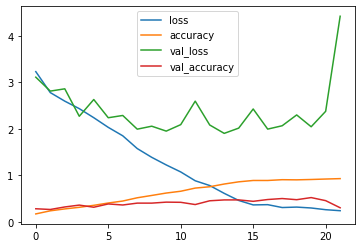

In [22]:
pd.DataFrame(model.history.history).plot()

In [32]:
predictions = np.array([])
labels =  np.array([])
for x, y in val_ds:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
  labels = np.concatenate([labels, y.numpy()])

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(labels,predictions))

              precision    recall  f1-score   support

         0.0       0.59      0.51      0.54        95
         1.0       0.40      0.33      0.36        43
         2.0       0.41      0.31      0.35        48
         3.0       0.53      0.58      0.55        71
         4.0       0.64      0.46      0.53        35
         5.0       0.39      0.24      0.30        45
         6.0       0.65      0.66      0.66       116
         7.0       1.00      0.50      0.67         2
         8.0       0.48      0.32      0.38        41
         9.0       0.56      0.73      0.63       116
        10.0       0.42      0.30      0.35        57
        11.0       0.43      0.39      0.41        31
        12.0       0.48      0.58      0.52       193
        13.0       0.62      0.48      0.54        50
        14.0       0.47      0.49      0.48       100
        15.0       0.39      0.31      0.34        81
        16.0       0.20      0.30      0.24        23
        17.0       0.56    